In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


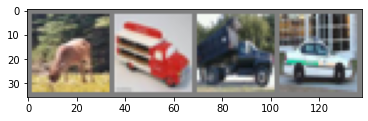

deer  truck truck car  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(2):  # loop over the dataset multiple times
    RL=[]
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            RL.append([epoch + 1,i + 1,running_loss/2000])
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.316
[1,  4000] loss: 1.310
[1,  6000] loss: 1.326
[1,  8000] loss: 1.299
[1, 10000] loss: 1.297
[1, 12000] loss: 1.288
[2,  2000] loss: 1.281
[2,  4000] loss: 1.318
[2,  6000] loss: 1.307
[2,  8000] loss: 1.305
[2, 10000] loss: 1.331
[2, 12000] loss: 1.303
Finished Training


In [46]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

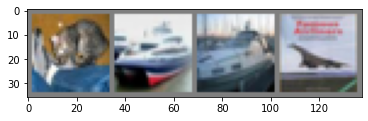

GroundTruth:  cat   ship  ship  plane


In [47]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [48]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [49]:
outputs = net(images)

In [50]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   ship 


In [51]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 52 %


In [52]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.0 %
Accuracy for class: car   is 82.7 %
Accuracy for class: bird  is 20.0 %
Accuracy for class: cat   is 26.7 %
Accuracy for class: deer  is 36.5 %
Accuracy for class: dog   is 47.1 %
Accuracy for class: frog  is 71.8 %
Accuracy for class: horse is 59.0 %
Accuracy for class: ship  is 74.2 %
Accuracy for class: truck is 47.5 %


In [53]:
print(batch_size)

4


In [54]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

[(2000, 1.316), (4000, 1.31), (6000, 1.326), (8000, 1.299), (10000, 1.297), (12000, 1.288)]


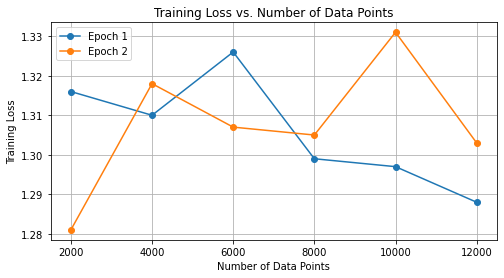

In [60]:
#data = [list(map(float, point)) for point in RL]
# Provided data
data = [
    [1, 2000, 1.316],
    [1, 4000, 1.310],
    [1, 6000, 1.326],
    [1, 8000, 1.299],
    [1, 10000, 1.297],
    [1, 12000, 1.288],
    [2, 2000, 1.281],
    [2, 4000, 1.318],
    [2, 6000, 1.307],
    [2, 8000, 1.305],
    [2, 10000, 1.331],
    [2, 12000, 1.303]]
# Separate the data for each epoch
epoch_1 = [(point[1], point[2]) for point in data if point[0] == 1]
epoch_2 = [(point[1], point[2]) for point in data if point[0] == 2]
print(epoch_1)
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot([point[0] for point in epoch_1], [point[1] for point in epoch_1], marker='o', linestyle='-', label='Epoch 1')
plt.plot([point[0] for point in epoch_2], [point[1] for point in epoch_2], marker='o', linestyle='-', label='Epoch 2')
plt.title("Training Loss vs. Number of Data Points")
plt.xlabel("Number of Data Points")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

Successful Cases:


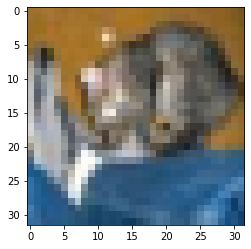

Predicted: cat


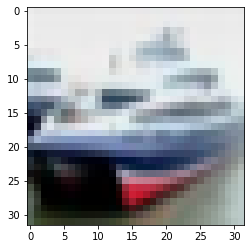

Predicted: ship


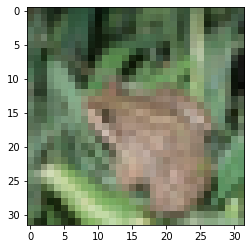

Predicted: frog


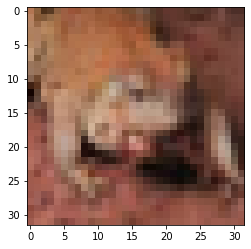

Predicted: frog
Failure Cases:


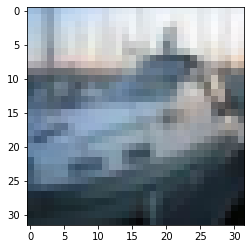

Predicted: car, True: ship


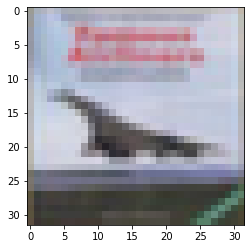

Predicted: ship, True: plane


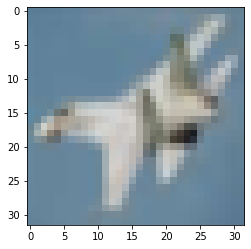

Predicted: ship, True: plane


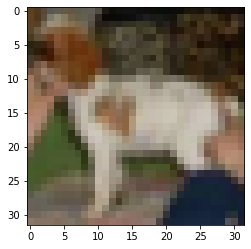

Predicted: frog, True: dog


In [61]:
# ... (previous code)

# Load the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

# Create lists to store successful and failure cases
successful_cases = []
failure_cases = []

# Loop through the test dataset
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        # Check successful and failure cases
        for i in range(batch_size):
            if predicted[i] == labels[i]:
                successful_cases.append((images[i], predicted[i]))
            else:
                failure_cases.append((images[i], predicted[i], labels[i]))

# Display some successful cases
print("Successful Cases:")
for i in range(min(4, len(successful_cases))):
    image, predicted_label = successful_cases[i]
    imshow(torchvision.utils.make_grid(image))
    print(f"Predicted: {classes[predicted_label]}")

# Display some failure cases
print("Failure Cases:")
for i in range(min(4, len(failure_cases))):
    image, predicted_label, true_label = failure_cases[i]
    imshow(torchvision.utils.make_grid(image))
    print(f"Predicted: {classes[predicted_label]}, True: {classes[true_label]}")


Files already downloaded and verified


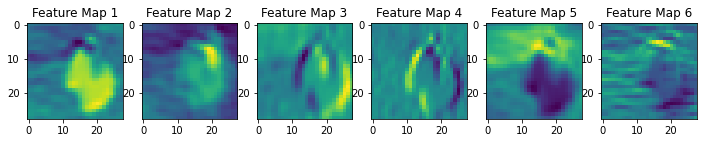

In [62]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a function to visualize the feature maps
def visualize_first_layer_feature_maps(model, image):
    # Set the model to evaluation mode
    model.eval()

    # Create a hook to access the first layer's output
    activation = {}

    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output
        return hook

    # Register the hook for the first layer
    model.conv1.register_forward_hook(get_activation('conv1'))

    # Pass the image through the model
    with torch.no_grad():
        model(image)

    # Get the feature maps from the hook
    feature_maps = activation['conv1']

    # Plot the feature maps
    num_feature_maps = feature_maps.size(1)
    plt.figure(figsize=(12, 4))
    for i in range(num_feature_maps):
        plt.subplot(1, num_feature_maps, i + 1)
        plt.imshow(feature_maps[0, i].cpu(), cmap='viridis')
        plt.title(f"Feature Map {i + 1}")
    plt.show()

# Define the transform to preprocess the image
transform = transforms.Compose([transforms.ToTensor()])

# Load the CIFAR-10 training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

# Load a random image from the training set
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Visualize the feature maps of the first layer
visualize_first_layer_feature_maps(net, images)


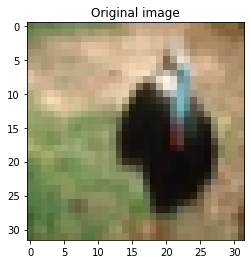

In [63]:
plt.figure(figsize=(12, 4))
plt.imshow(images[0].permute(1, 2, 0))  # Permute the dimensions for correct display
plt.title(f"Original image")
plt.show()